# Analyze a Single Simulation Grid via Cell Colors

In [22]:
# imports
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from simulation import Simulation


# set plotting style
plt.style.use(['default', 'biophysics.mplstyle'])

# import simulation data to the Simulation class
data_dir = Path('data/tm_sweep_false')
sim_file = data_dir / 'sim_50_5.mat'
sim = Simulation(mat_file=sim_file, skip_check=True)
sim.set_color_dict({
    sim.get_grid_type('tau'): 'tab:blue',
    sim.get_grid_type('map6'): 'tab:orange',
    sim.get_grid_type('empty'): 'white',
    sim.get_grid_type('notexist'): 'grey',
})

# define figure save directory
fig_dir = Path('figures') / data_dir.name
fig_dir.mkdir(parents=True, exist_ok=True)

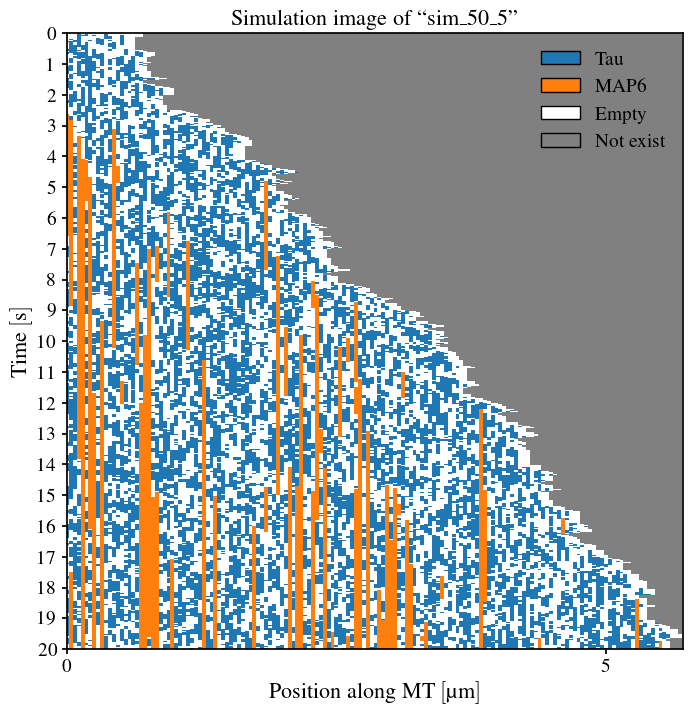

In [23]:
# make a plot that uses cell coloring to analyze a 2D array
fig, ax = plt.subplots()

# get the raw grid and time vec
time = sim.get_time_vec()
grid = sim.get_raw_grid()

# create custom cmap from color_dict
color_dict = sim.get_color_dict()
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'custom-cmap',
    [color_dict[0], color_dict[1], color_dict[2], color_dict[3]]
)

# generate the grid plot
# force a square ratio by calculating the aspect ratio
aspect = grid.shape[1] / grid.shape[0]
ax.imshow(grid, cmap=cmap, interpolation='none', aspect=aspect)

# change axis limits
ax.set_xlim(0, grid.shape[1])
ax.set_ylim(grid.shape[0], 0)

# rescale the y-axis from steps to time
tick_interval = 1
# get the nearest floored integer of length thats a multiple of the tick count
tick_count = int(np.floor(time[-1] / tick_interval))
# generate the labels
labels = np.arange(0, tick_count+1) * tick_interval
# calculate the labels position based off the max time
label_positions = labels / time[-1] * grid.shape[0]
# set the ticks and labels
ax.set_yticks(ticks=label_positions, labels=labels)

# rescale the x-axis from domains to position
tick_interval = 5
# get the nearest floored integer of length thats a multiple of the tick count
tick_count = int(np.floor(sim.get_max_length() / tick_interval))
# generate the labels
labels = np.arange(0, tick_count+1) * tick_interval
# calculate the labels position based off the max length
label_positions = labels / sim.get_max_length() * grid.shape[1]
# set the ticks and labels
ax.set_xticks(ticks=label_positions, labels=labels)


# add plot labels
ax.set_xlabel(r"Position along MT $\left[\qty{}{\micro\meter}\right]$")
ax.set_ylabel(r"Time $\left[\qty{}{\second}\right]$")
ax.set_title(f"Simulation image of ``{sim.get_name()}\'\'")

# add a legend
handles = [
    mpl.patches.Patch(facecolor=color_dict[sim.get_grid_type('tau')], label='Tau', edgecolor='black'),
    mpl.patches.Patch(facecolor=color_dict[sim.get_grid_type('map6')], label='MAP6', edgecolor='black'),
    mpl.patches.Patch(facecolor=color_dict[sim.get_grid_type('empty')], label='Empty', edgecolor='black'),
    mpl.patches.Patch(facecolor=color_dict[sim.get_grid_type('notexist')], label='Not exist', edgecolor='black'),
]
ax.legend(handles=handles, loc='upper right')

# save the figure
fig_file = fig_dir / f"simulation_image_of_{sim.get_name()}"
fig.savefig(fig_file)